In [76]:
import os
import pickle
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

In [77]:
TOKEN_DIR = '../data/BILLS/token'

In [78]:
def plot_terms(labels, values):
    indices = np.argsort(values)[::-1]

    labels = np.array(labels)[indices]
    values = np.array(values)[indices]
    indexes = np.arange(len(labels))

    # Set the size of the chart & chart the results.
    fig = plt.figure(figsize=(25, 10), dpi=160)
    plt.bar(indexes, values, color='#ff8000')
    plt.xticks(indexes, labels, rotation=30)
    plt.show()

In [79]:
counts = Counter()
token_dict = {}

for token_file in os.listdir(TOKEN_DIR):
    try:
        with open( os.path.join( TOKEN_DIR, token_file ), 'rb' ) as fhand:
            tokens = pickle.load( fhand )
            counts.update(tokens)
            token_dict[token_file] = tokens
    except Exception:
        print( f'Error with {token_file}' )

# Token Frequency

In [80]:
labels, values = zip(*counts.most_common(50))

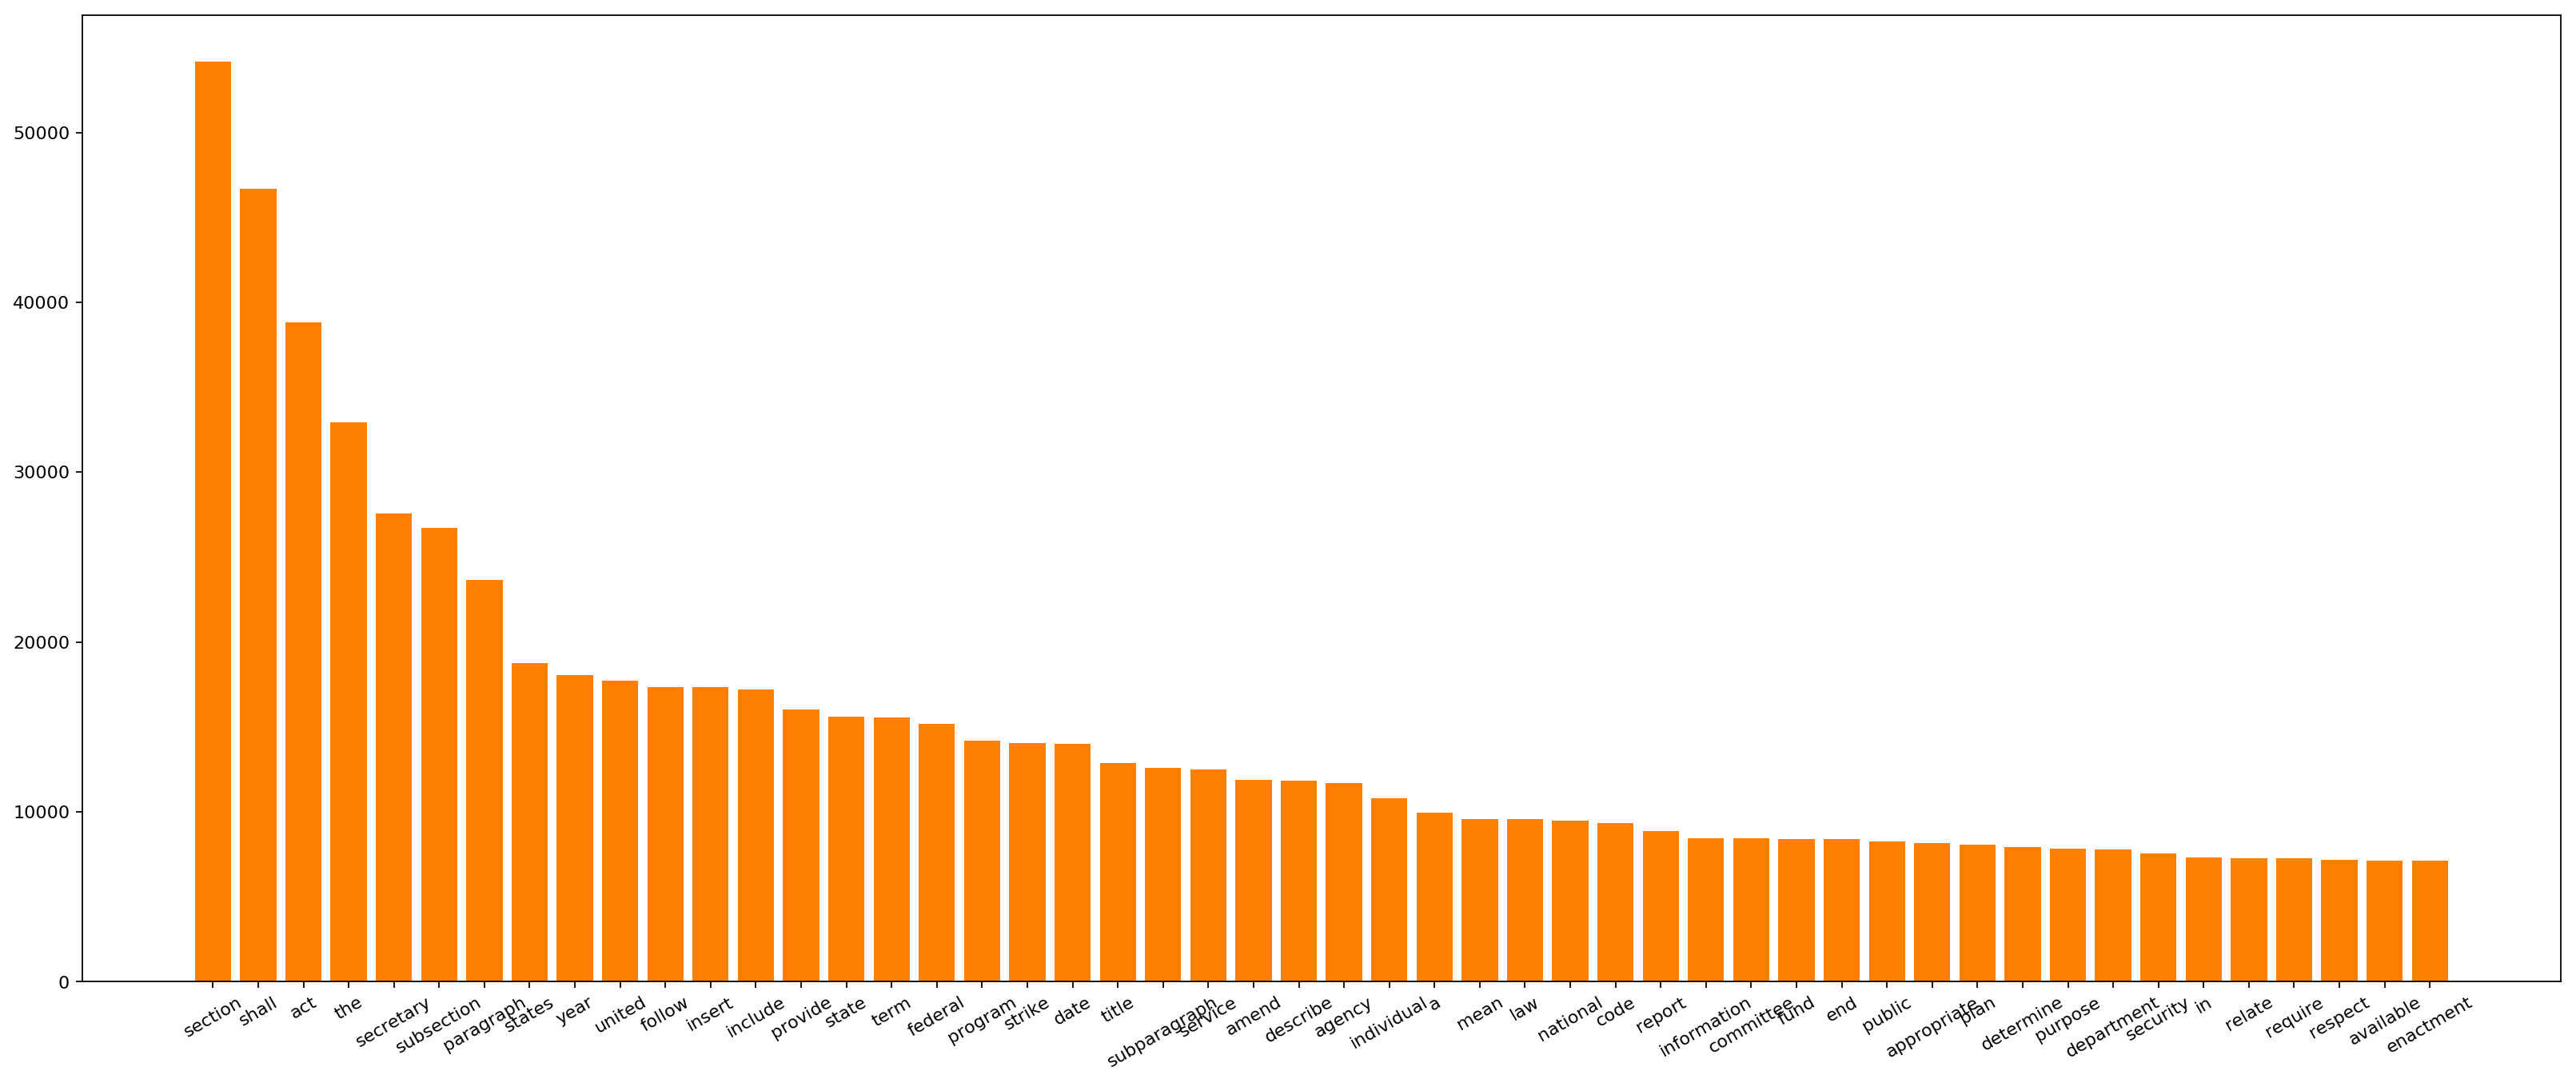

In [81]:
plot_terms(labels, values)

# TD-IDF per document

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

def top_tokens(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_tokens = [(features[i], row[i]) for i in topn_ids]
    return top_tokens

def top_mean_feats(matrix, features, top_n=25):
    # Convert to a numpy array, calculate the mean and return the top tokens.
    D = matrix.toarray()
    tfidf_means = np.mean(D, axis=0)
    return top_tokens(tfidf_means, features, top_n)

In [83]:
tfidf = TfidfVectorizer(max_df=0.5, min_df=0.05, preprocessor=lambda x: x, tokenizer=lambda x: x)

In [84]:
labels, values = zip(*top_mean_feats(tfs, features, top_n=50))

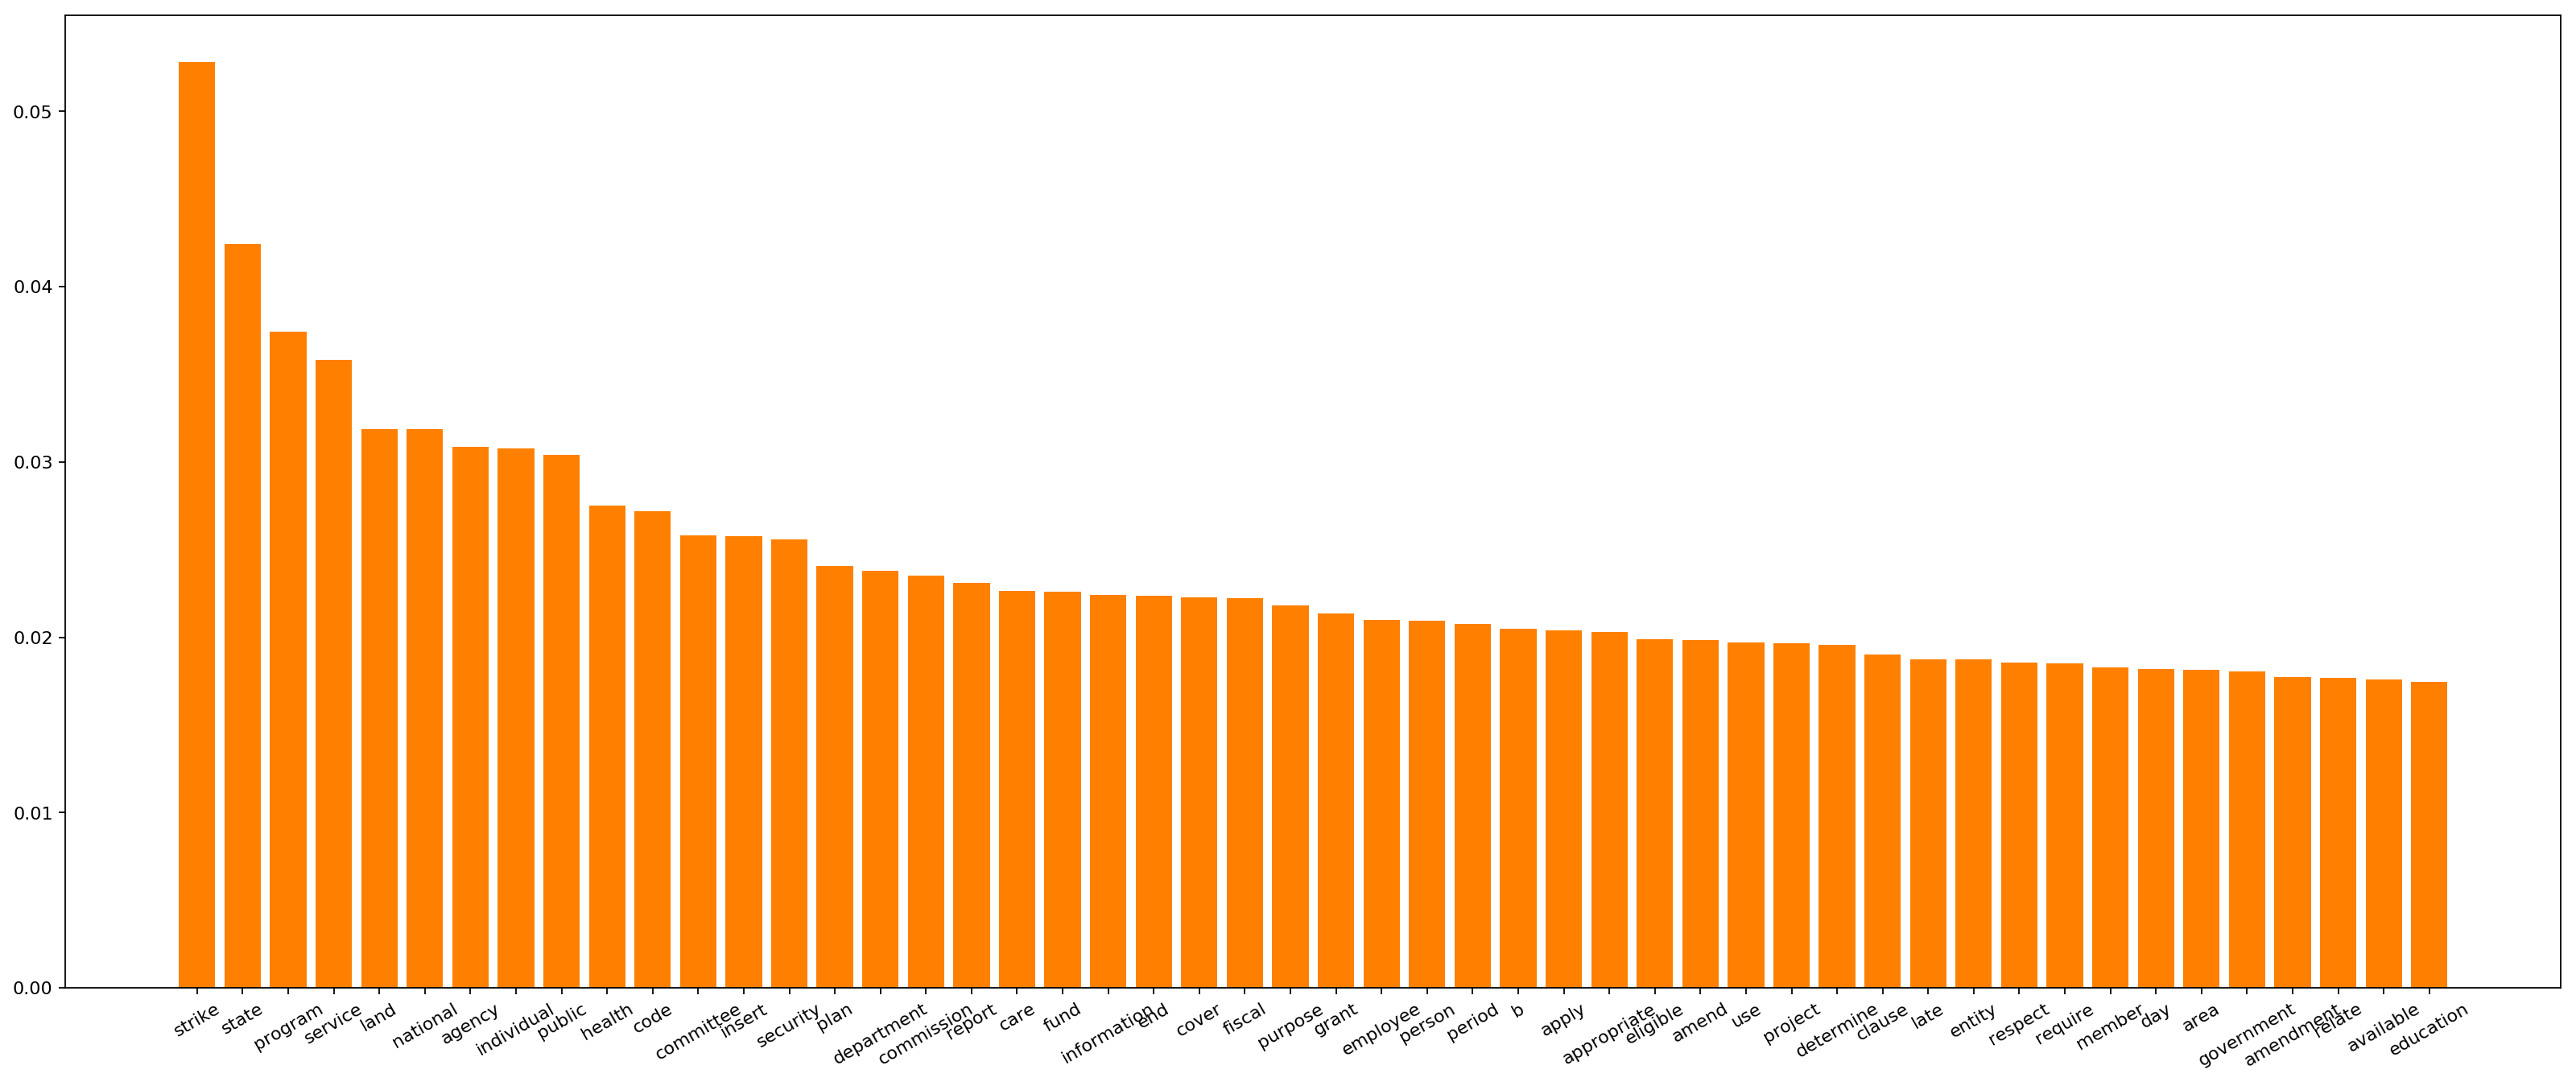

In [85]:
plot_terms( labels, values )